tgb - 11/19/2019 - The goal of this notebook is to unifying all panels of Figures 1 and 2 in a single notebook.  
1) Save the reduced data in notebooks 007 and 008  
2) Adapt scripts to load reduced data in order to plot each panel   

# 0) Initialization

In [1]:
import util.Landau_Potential_Diffusion as Landau
import util.curvature as curve
import util.pdf as PDF

import xarray as xr
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import datetime
import pickle
from skimage import measure
from scipy import ndimage
import scipy.integrate as sin
from scipy.optimize import curve_fit
import matplotlib as mpl

In [2]:
# Figure characteristics common to all Figures
fz = 15
lw = 3
siz = 10

plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
mpl.rcParams['lines.markersize'] = siz
plt.close('all')

In [3]:
# Physical constants
stday = 24*3600

In [21]:
# Path of PKL_DATA folder and home
#pathPKL = '/users/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
pathPKL = '/nfs/twcroninlab002/tbeucler/2019_WMI/dev/tbeucler/PKL_DATA/'
path_home = '/home/tbeucler/'

tgb - 11/19/2019 - Define Bunch class from [https://stackoverflow.com/questions/2597278/python-load-variables-in-a-dict-into-namespace] to avoid painful dictionary references

In [22]:
class Bunch(object):
  
    def __init__(self, adict):
        self.__dict__.update(adict)

In [23]:
def edgTObin(edges):
    return 0.5*(edges[1:]+edges[:-1])

In [28]:
def date_index(time_array,time_index):
    return time_array[time_index].values

# 1) Figure 1

In [24]:
# Load reduced data into dictionary S
path = pathPKL+'2019_11_19_Fig1a.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1a = Bunch(S)

In [25]:
path = pathPKL+'2019_11_19_Fig1b.pkl'
hf = open(path,'rb')
S = pickle.load(hf)
F1b = Bunch(S)

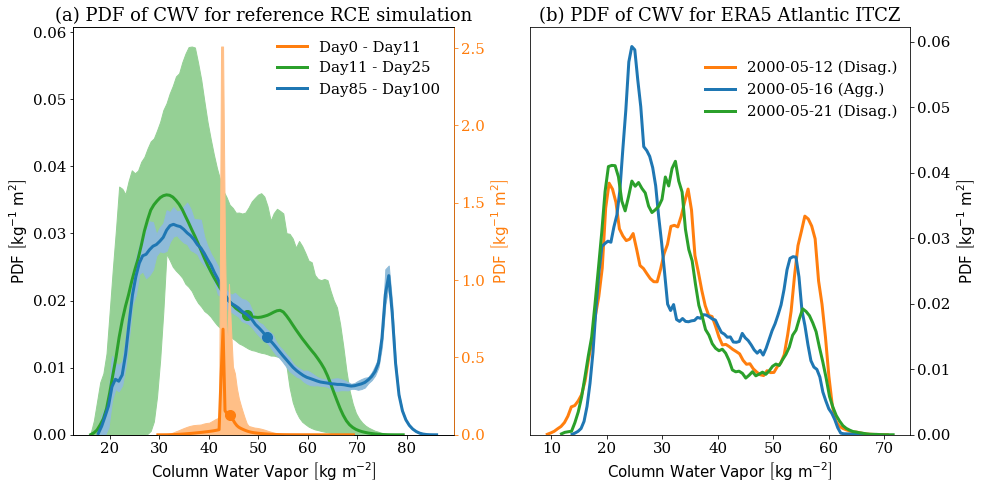

In [35]:
fig,ax = plt.subplots(1,2,figsize=(15,7.5))

# Figure 1a
ax2 = ax[0].twinx()

# Shading goes in the back
ax2.fill_between(edgTObin(F1a.SPINedges),F1a.SPIN_min,F1a.SPIN_max,color=1-(1-F1a.SPINrgb)/2)
ax[0].fill_between(edgTObin(F1a.COALedges),F1a.COAL_min,F1a.COAL_max,color=1-(1-F1a.COALrgb)/2)
ax[0].fill_between(edgTObin(F1a.COARedges),F1a.COAR_min,F1a.COAR_max,color=1-(1-F1a.COARrgb)/2)

# Right axis = Day 11-100
SPINline = ax2.plot(edgTObin(F1a.SPINedges),F1a.CWV_PDF_SPIN,color=F1a.SPINrgb,label='Day0 - Day11')
# Add dots to indicate mean value of percentile chosen for MMLi
ax2.scatter(x=F1a.SPIN_P48_mean,y=np.interp(x=F1a.SPIN_P48_mean,xp=edgTObin(F1a.SPINedges),fp=F1a.CWV_PDF_SPIN),color=F1a.SPINrgb)

ax2.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$',color=F1a.SPINrgb)
ax2.spines['right'].set_color(F1a.SPINrgb)
ax2.tick_params(axis='y', colors=F1a.SPINrgb)
ax2.set_ylim((0,ax2.get_ylim()[1]))
leg2 = ax2.legend(frameon=False,bbox_to_anchor=(0,0,0.95,1))

# Left axis = Day0-Day11
COALline = ax[0].plot(edgTObin(F1a.COALedges),F1a.CWV_PDF_COAL,color=F1a.COALrgb,label='Day11 - Day25')
COARline = ax[0].plot(edgTObin(F1a.COARedges),F1a.CWV_PDF_COAR,color=F1a.COARrgb,label='Day85 - Day100')
# Add dots to indicate mean value of percentile chosen for MMLi
ax[0].scatter(x=F1a.COAL_P48_mean,y=np.interp(x=F1a.COAL_P48_mean,xp=edgTObin(F1a.COALedges),fp=F1a.CWV_PDF_COAL),color=F1a.COALrgb)
ax[0].scatter(x=F1a.COAR_P48_mean,y=np.interp(x=F1a.COAR_P48_mean,xp=edgTObin(F1a.COARedges),fp=F1a.CWV_PDF_COAR),color=F1a.COARrgb)

leg = ax[0].legend(frameon=False,bbox_to_anchor=(0,0,1,0.95))
ax[0].set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax[0].set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax[0].set_ylim((0,ax[0].get_ylim()[1]))
ax[0].set_title('(a) PDF of CWV for reference RCE simulation')

plt.draw()

# Figure 1b
LEFT1line = ax[1].plot(edgTObin(F1b.LEFT1edges),F1b.CWV_PDF1_LEFT,color=F1a.SPINrgb,
                    label=str(date_index(F1b.tcoor,F1b.ileft))[:10]+' (Disag.)')
MIDline = ax[1].plot(edgTObin(F1b.MID1edges),F1b.CWV_PDF1_MID,color=F1a.COARrgb,
                  label=str(date_index(F1b.tcoor,F1b.imid))[:10]+' (Agg.)')
RIGHTline = ax[1].plot(edgTObin(F1b.RIGHT1edges),F1b.CWV_PDF1_RIGHT,color=F1a.COALrgb,
                    label=str(date_index(F1b.tcoor,F1b.iright))[:10]+' (Disag.)')
leg = ax[1].legend(frameon=False,bbox_to_anchor=(0,0,1,0.95))
ax[1].set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax[1].set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax[1].set_ylim((0,ax[1].get_ylim()[1]))
ax[1].set_title('(b) PDF of CWV for ERA5 Atlantic ITCZ')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.draw()

# Save figure
plt.savefig(path_home+'Fig1.pdf',format='pdf')

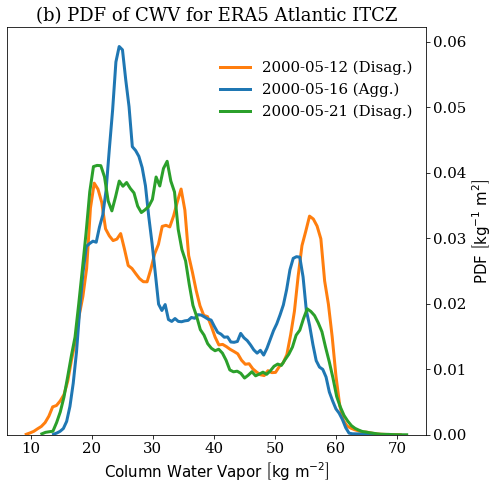

In [29]:
fig,ax = plt.subplots(figsize=(7.5,7.5))

LEFT1line = ax.plot(edgTObin(F1b.LEFT1edges),F1b.CWV_PDF1_LEFT,color=F1a.SPINrgb,
                    label=str(date_index(F1b.tcoor,F1b.ileft))[:10]+' (Disag.)')
MIDline = ax.plot(edgTObin(F1b.MID1edges),F1b.CWV_PDF1_MID,color=F1a.COARrgb,
                  label=str(date_index(F1b.tcoor,F1b.imid))[:10]+' (Agg.)')
RIGHTline = ax.plot(edgTObin(F1b.RIGHT1edges),F1b.CWV_PDF1_RIGHT,color=F1a.COALrgb,
                    label=str(date_index(F1b.tcoor,F1b.iright))[:10]+' (Disag.)')
leg = ax.legend(frameon=False,bbox_to_anchor=(0,0,1,0.95))
ax.set_xlabel(r'$\mathrm{Column\ Water\ Vapor\ }\left[\mathrm{kg\ m^{-2}}\right]$')
ax.set_ylabel(r'$\mathrm{PDF\ }\left[\mathrm{kg^{-1}\ m^{2}}\right]$')
ax.set_ylim((0,ax.get_ylim()[1]))
ax.set_title('(b) PDF of CWV for ERA5 Atlantic ITCZ')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.draw()

# 2) Figure 2

In [16]:
# Load reduced data into dictionary S
path = pathPKL+'2019_11_19_Fig2ac.pkl'
hf = open(path,'rb')
S = pickle.load(hf)

In [17]:
F2a = Bunch(S)

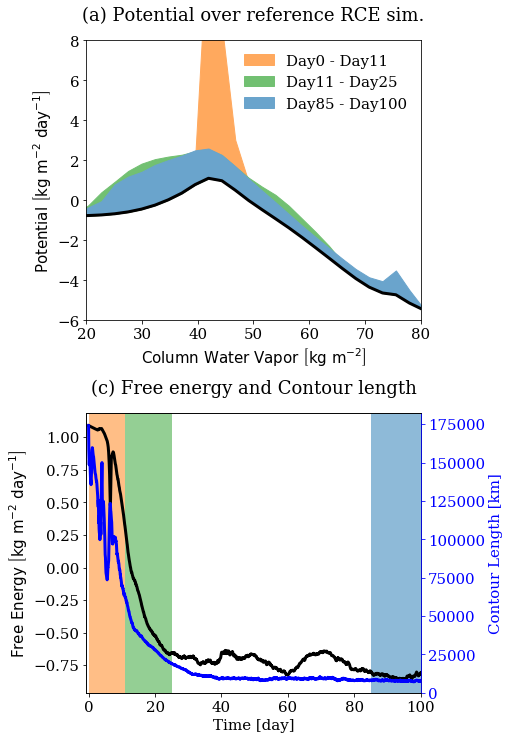

In [19]:
fig,ax = plt.subplots(2,1,figsize=(6,12))
plt.subplots_adjust(hspace=0.33)

ax[0].plot(F2a.binm,stday*F2a.V,color='k')
ax[0].set_xlim((20,80))
ax[0].set_ylim((-6,8))
ax[0].set_title('(a) Potential over reference RCE sim.',pad=20)
ax[0].set_xlabel(r'$\mathrm{Column\ Water\ Vapor}\ \left[\mathrm{kg\ m^{-2}}\right]$')
ax[0].set_ylabel(r'$\mathrm{Potential\ \left[kg\ m^{-2}\ day^{-1}\right]}$')

ax[0].fill_between(edgTObin(F2a.SPINe),stday*F2a.V,
                   stday*(F2a.V+7.5e-4*F2a.TQV_PDF_SPIN),
                   color=1-(1-F1a.SPINrgb)/1.5,label='Day0 - Day11')
ax[0].fill_between(edgTObin(F2a.COALe),
                   stday*F2a.V,stday*(F2a.V+7.5e-4*F2a.TQV_PDF_COAL),
                   color=1-(1-F1a.COALrgb)/1.5,label='Day11 - Day25')
ax[0].fill_between(edgTObin(F2a.COARe),
                   stday*F2a.V,stday*(F2a.V+7.5e-4*F2a.TQV_PDF_COAR),
                   color=1-(1-F1a.COARrgb)/1.5,label='Day85 - Day100')
ax[0].legend(frameon=False,loc='upper right')

axbis = ax[1].twinx()
axbis.plot(F2a.tcoor/stday,F2a.CL/1e3,color='b')
axbis.spines['right'].set_color('b')
axbis.tick_params(axis='y', colors='b')
axbis.set_ylim((0,axbis.get_ylim()[1]))
axbis.set_ylabel('Contour Length [km]',color='b')

ax[1].plot(F2a.tcoor/stday,stday*F2a.F,color='k')

# From https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html
trans = mtransforms.blended_transform_factory(ax[1].transData,ax[1].transAxes)
ax[1].fill_between(x=F2a.tcoor/stday,y1=0,y2=1,where=(F2a.tcoor/stday<=11)&(F2a.tcoor/stday>=0),
                   facecolor=F1a.SPINrgb,alpha=0.5,transform=trans)
ax[1].fill_between(x=F2a.tcoor/stday,y1=0,y2=1,where=(F2a.tcoor/stday<=25)&(F2a.tcoor/stday>=11),
                   facecolor=F1a.COALrgb,alpha=0.5,transform=trans)
ax[1].fill_between(x=F2a.tcoor/stday,y1=0,y2=1,where=(F2a.tcoor/stday<=100)&(F2a.tcoor/stday>=85),
                   facecolor=F1a.COARrgb,alpha=0.5,transform=trans)

ax[1].set_title('(c) Free energy and Contour length',pad=20)
ax[1].set_xlim((-0.75,100))
ax[1].set_xlabel('Time [day]')
ax[1].set_ylabel(r'$\mathrm{Free\ Energy\ \left[kg\ m^{-2}\ day^{-1}\right]}$')

# Save figure
plt.savefig(path_home+'Fig2.pdf',format='pdf')